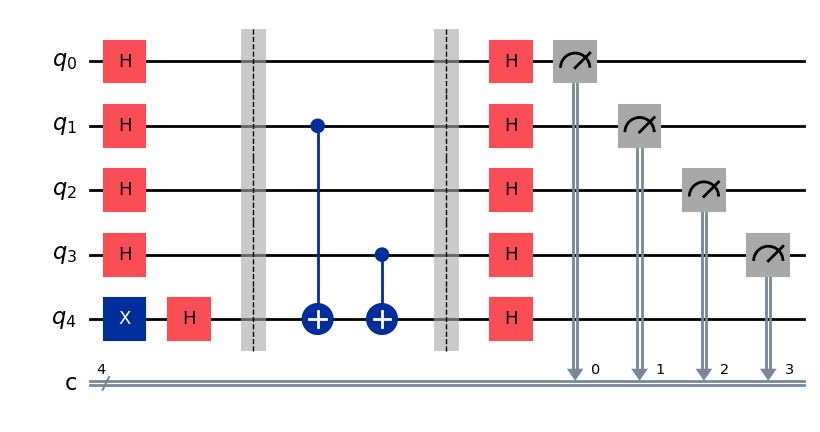

In [15]:
from qiskit import *
%matplotlib inline

from qiskit.tools.visualization import plot_histogram

# Create Bernstain-Vazirani circuit for n bit string
# - Changing the bit string will change the circuit
mypassword = '1010'

circuit = QuantumCircuit(len(mypassword)+1, len(mypassword))

# Apply Hadamard gates before querying the oracle
circuit.h(range(len(mypassword)))

circuit.x(len(mypassword))
circuit.h(len(mypassword))
# Apply barrier for visual separation
circuit.barrier()

# Apply the inner-product oracle
for ii, oneorzero in enumerate(reversed(mypassword)):
    if oneorzero == '1':
        circuit.cx(ii, len(mypassword))

# Apply barrier for visual separation
circuit.barrier()

# Apply Hadamard gates after querying the oracle
circuit.h(range(len(mypassword)+1))

# Measure the input register
circuit.measure(range(len(mypassword)), range(len(mypassword)))

circuit.draw(style='iqp', output='mpl')


- Is no necesary use the last Hadamard gate in the las qubit, because the oracle is the same.

In [16]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

{'1010': 1}
